In [1]:
import cv2
from imutils.perspective import four_point_transform
from imutils import contours
import imutils
import matplotlib.pyplot as plt
from skimage import io, color, data, filters
import numpy as np
import os
import shutil

from skimage import morphology as mo
from skimage import transform as tr
from sklearn.linear_model import LinearRegression

In [2]:
class ImgCleaner():
    def __init__(self, img:np.ndarray):
        self.original_img = img
        self.thresholded_img = self.thresholding()
        
    def thresholding(self):
        img_gray = color.rgb2gray(self.original_img)
        thresh = filters.threshold_li(img_gray)
        binary = img_gray > thresh
        return binary
        
    def get_left_border(self):
        horizon_distribution = np.sum(~self.thresholded_img, axis=0)
        sorted_horizon_distribution = sorted(horizon_distribution)
        for i in range(len(horizon_distribution)):
            if horizon_distribution[i] == sorted_horizon_distribution[-1]:
                left = i
                return left
            
    def get_bottom(self):
        vertical_distribution = np.sum(~self.thresholded_img, axis=1)
        sorted_vertical_distribution = sorted(vertical_distribution)
        for i in range(len(vertical_distribution)):
            if vertical_distribution[i] == sorted_vertical_distribution[-1]:
                bottom = i
                return bottom
        
    def clean_upper_bottom(self):
        no_upper_bottom_img = self.thresholded_img
        left = self.get_left_border()
        temp_img = ~self.thresholded_img[:,left:]
        vertical_distribution = np.sum(temp_img, axis=1)
        sorted_vertical_distribution = sorted(vertical_distribution)
        if sorted_vertical_distribution[-1] == sorted_vertical_distribution[-2]:
            for i in range(len(vertical_distribution)):
                if vertical_distribution[i] == sorted_vertical_distribution[-1]:
                    for j in range(temp_img.shape[1]):
                        no_upper_bottom_img[i][left+j] = True
                    break
        return no_upper_bottom_img
    
    def clean_right_border(self):
        no_right_border_img = self.thresholded_img
        bottom = self.get_bottom()
        temp_img = ~self.thresholded_img[:bottom, :]
        horizon_distribution = np.sum(temp_img, axis=0)
        sorted_horizon_distribution = sorted(horizon_distribution)
        if sorted_horizon_distribution[-1] == sorted_horizon_distribution[-2]:
            for i in range(len(horizon_distribution)-1, 0, -1):
                if horizon_distribution[i] == sorted_horizon_distribution[-1]:
                    for j in range(temp_img.shape[0]):
                        no_right_border_img[j][i] = True
                    break
        return no_right_border_img
    
    def clean_number_direction(self):
        

In [3]:
ImgCleaner(io.imread("sciFinder-spectrum/MS/5029-67-4.gif")).clean_right_border()

/home/user/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  import sys
/home/user/miniconda/lib/python3.7/site-packages/skimage/filters/thresholding.py:701: RuntimeWarning: divide by zero encountered in log
  (np.log(mean_back) - np.log(mean_fore)))


array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [2]:
img = io.imread("sciFinder-spectrum/MS/5029-67-4.gif")

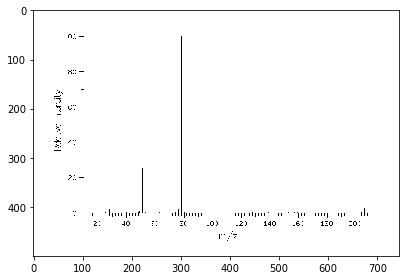

In [3]:
io.imshow(img)

In [4]:
def thresholding(original_img):
    img_gray = color.rgb2gray(original_img)
    thresh = filters.threshold_li(img_gray)
    binary = img_gray > thresh
    return binary

img = thresholding(img)

/home/user/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  
/home/user/miniconda/lib/python3.7/site-packages/skimage/filters/thresholding.py:701: RuntimeWarning: divide by zero encountered in log
  (np.log(mean_back) - np.log(mean_fore)))


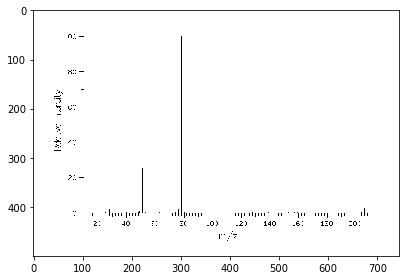

In [5]:
io.imshow(img)

In [16]:
vertical_distribution = np.sum(~img, axis=1)
sorted_vertical_distribution = sorted(vertical_distribution)
for i in range(len(vertical_distribution)):
    if vertical_distribution[i] == sorted_vertical_distribution[-2]:
        top = i
    if vertical_distribution[i] == sorted_vertical_distribution[-1]:
        bottom = i
top, bottom            

(36, 412)

In [17]:
horizon_distribution = np.sum(~img, axis=0)
sorted_horizon_distribution = sorted(horizon_distribution)
for i in range(len(horizon_distribution)):
    if horizon_distribution[i] == sorted_horizon_distribution[-1]:
        left = i
    if horizon_distribution[i] == sorted_horizon_distribution[-2]:
        right = i
left, right

(103, 691)

In [21]:
vertical_distribution = np.sum(~img[:,left:], axis=1)
sorted_vertical_distribution = sorted(vertical_distribution)
print(sorted_vertical_distribution)
for i in range(len(vertical_distribution)):
    if vertical_distribution[i] == sorted_vertical_distribution[-2]:
        top = i
    if vertical_distribution[i] == sorted_vertical_distribution[-1]:
        bottom = i
top, bottom

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

(412, 412)